# **hint** this notebook only for learning purpose to illustrate the different methods using in linear regression  the model performance output is very bad so keep it as a reference

In [216]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


# import used libraries

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [218]:
df=pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# Data Cleaning 
* **check the null values**

* **check the duplicates**

In [219]:
df.isnull().sum() # no null values

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [220]:
df.duplicated().sum() # we have  4014 need to drop 

4014

In [221]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()  # check again the duplicates

0

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


In [223]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


In [224]:
# We will drop the salary  and salary_currency columns from our data and use salary in salary_in_usd because it may cause leakage while training and it will affect the model performance
df=df.drop(columns=['salary','salary_currency'])


In [225]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


**check the distribution of salary**

<Axes: xlabel='salary_in_usd', ylabel='Count'>

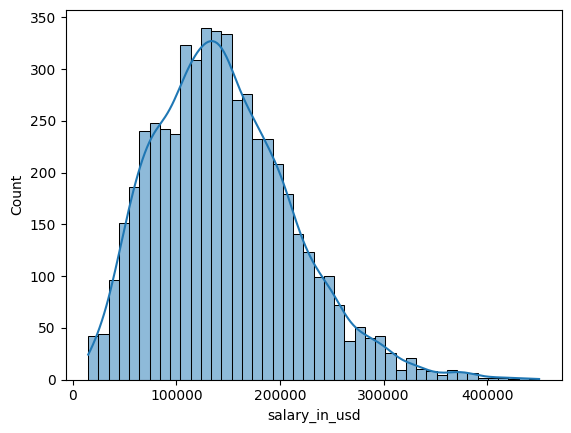

In [226]:
sns.histplot(df.salary_in_usd,kde=True)

 # EDA

**top 10 countries which pay the highest salaries**

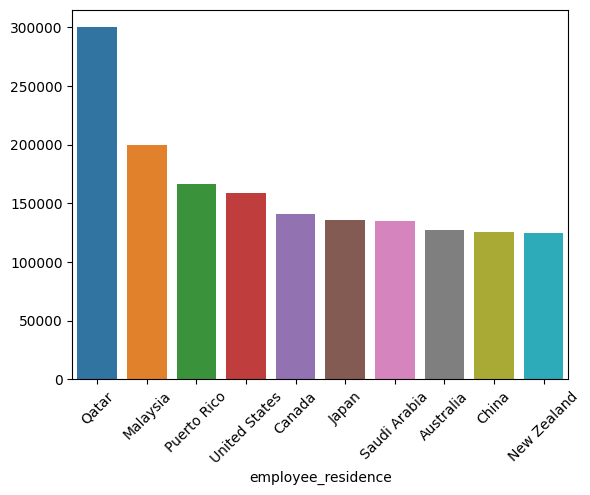

In [227]:
area_salary=df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=area_salary.nlargest(10).index,y=area_salary.nlargest(10).values)
plt.xticks(rotation =45);

**which job category has the highest salary**

<Axes: xlabel='job_category'>

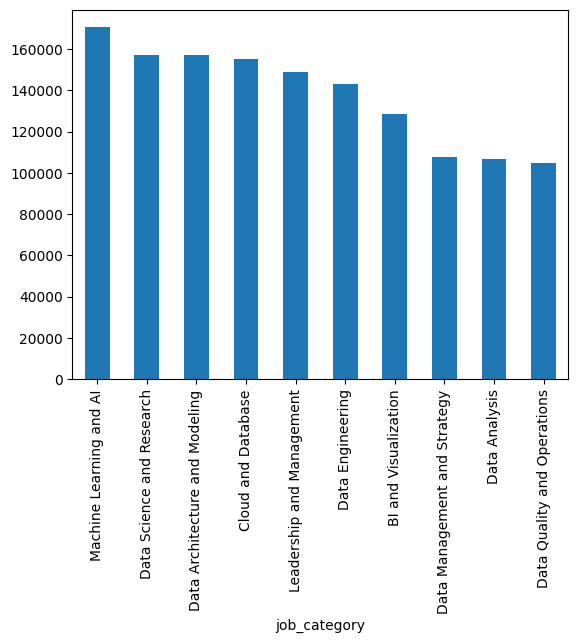

In [228]:
category_salary=df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)
category_salary.plot(kind='bar')

**top 10 jobs which has the highest salary**

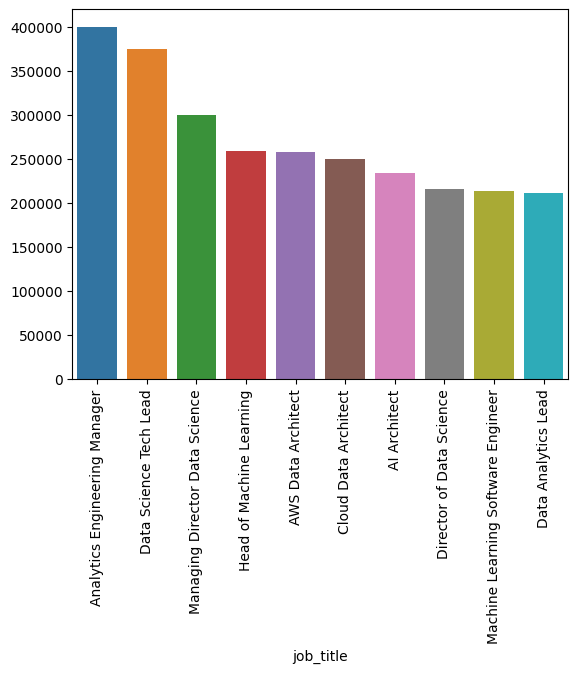

In [229]:
category_salary=df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=category_salary.nlargest(10).index,y=category_salary.nlargest(10).values)
plt.xticks(rotation=90);

**relation between experience level and salary**

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

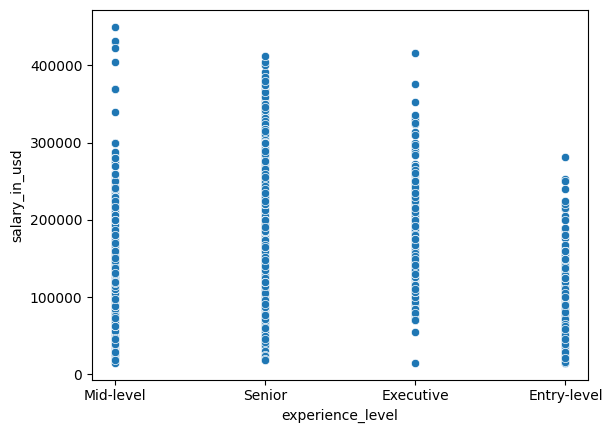

In [230]:
sns.scatterplot(x=df.experience_level,y=df.salary_in_usd) 

**which type of work paid the highest salary**

<Axes: ylabel='salary_in_usd'>

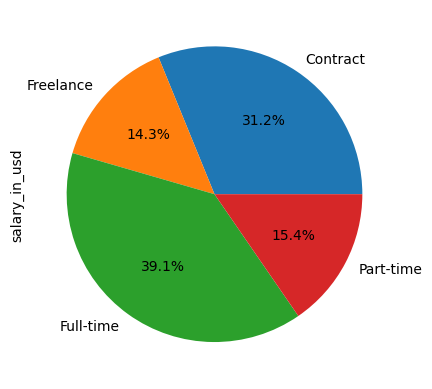

In [231]:
work_type_salary=df.groupby('employment_type')['salary_in_usd'].mean()
work_type_salary.plot(kind='pie',autopct='%1.1f%%')

**relation between numerical columns**

In [232]:
df_num=df.select_dtypes(include='number')
df_num.corr()

,work_year,salary_in_usd
work_year,1.000000,0.178031
salary_in_usd,0.178031,1.000000


**check the outliers**

<Axes: >

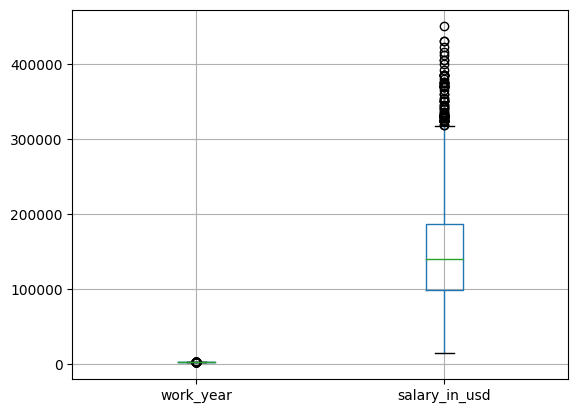

In [233]:
df.boxplot()

# **split the data**

In [234]:
X=df.drop(columns='salary_in_usd',axis=1 )
y=df.salary_in_usd.values


In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(4272, 9)
(1069, 9)


 # **dealing with categorical data  convert it to numeric**
  *  **we will use OrdinalEncoder and pandas get dymmies**

In [236]:
ordinal_inco=OrdinalEncoder()
x_train=ordinal_inco.fit_transform(X_train)
x_test=ordinal_inco.fit_transform(X_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4272, 9)
(1069, 9)
(4272,)
(1069,)


# Feature selection

In [237]:
feature_names=[]
importance_values=[]
columns=ordinal_inco.get_feature_names_out()
impo_features=mutual_info_regression(x_train,y_train)
for feature,importance in zip(columns, impo_features):
   feature_names.append(feature)
   importance_values.append(importance)


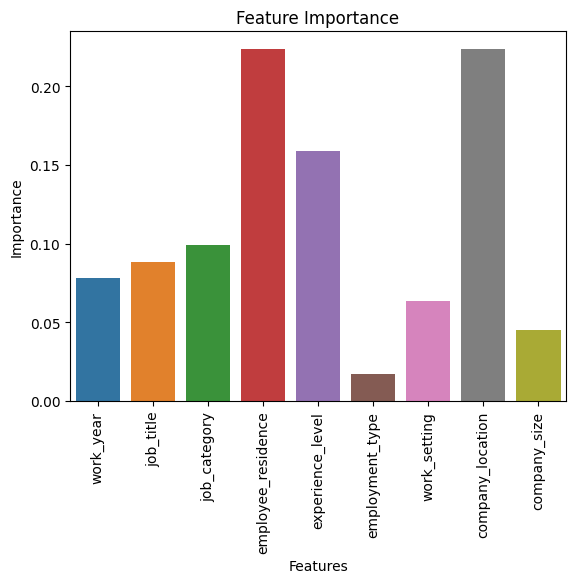

In [238]:
sns.barplot(x=feature_names,y=importance_values)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90);


**working now with get dummy**

In [239]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_columns)
X=df.drop(columns='salary_in_usd',axis=1 )
y=df.salary_in_usd.values


In [240]:
X_train_dum,X_test_dum,y_train_dum,y_test_dum=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train_dum.shape)
print(X_test_dum.shape)

(4272, 303)
(1069, 303)


**check the feature importance using randomforest**

In [241]:
rf=RandomForestRegressor()
rf.fit(X_train_dum,y_train_dum)
importance=rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_dum.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df.round(3))


                                  Feature  Importance
216      employee_residence_United States       0.232
128            job_category_Data Analysis       0.110
222               experience_level_Senior       0.057
0                               work_year       0.050
135  job_category_Machine Learning and AI       0.042
..                                    ...         ...
276          company_location_New Zealand       0.000
71          job_title_Data Scientist Lead       0.000
271                company_location_Malta       0.000
248              company_location_Ecuador       0.000
29         job_title_Cloud Data Architect       0.000

[303 rows x 2 columns]


**train different models with new incoding data using get dummy**

In [242]:
models={
    'dt':DecisionTreeRegressor(),
    'lr':LinearRegression(),
    'rf':RandomForestRegressor(),
    'svr':SVR()
}


In [243]:
for name, model in models.items():
    model.fit(X_train_dum, y_train_dum)
    y_pred = model.predict(X_test_dum)
    mse= mean_squared_error(y_pred, y_test)
    RMSE = np.sqrt(mse)
    r2=r2_score(y_pred,y_test)
    print(name, RMSE , r2)

dt 55976.2921722878 -0.2572367221164602
lr 4176363572543280.0 -4.723090405800434e-05
rf 53087.85342467677 -0.2997755619337197
svr 65173.16705707196 -2.1156897383330252e+16


# Train different models with all features 

In [244]:
models={
    'dt':DecisionTreeRegressor(),
    'lr':LinearRegression(),
    'rf':RandomForestRegressor(),
    'svr':SVR()
}




In [245]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse= mean_squared_error(y_pred, y_test)
    RMSE = np.sqrt(mse)
    r2=r2_score(y_pred,y_test)
    print(name, RMSE , r2)


dt 83315.83658532918 -1.7726007532375911
lr 62502.86670812928 -4.2684653695440735
rf 87244.45058781716 -16.600007081817097
svr 65169.74189254263 -1094432.6766671226


**let us train xgboost model to compre with   linear regression**

In [246]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest=xgb.DMatrix(x_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}


model = xgb.train(params, dtrain)

# Make predictions on the training data
y_pred = model.predict(dtest)
mse=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(mse)
r2=r2_score(y_pred,y_test)

print(RMSE)  # as we can see the RMSE for xgboost model is better than linear regression 
print(r2)

88400.57987008938
-13.388880509505016


**train the same models again with our new x_train_ after drop employment type feature**

In [247]:
for name, model in models.items():
    model.fit(x_train_, y_train)
    y_pred = model.predict(x_test_)
    mse= mean_squared_error(y_pred, y_test)
    RMSE = np.sqrt(mse)
    r2=r2_score(y_pred,y_test)

    print(name, RMSE,r2)


dt 93223.67765180895 -5.075951461007303
lr 63218.368040630696 -6.165380038646799
rf 88648.3810227977 -18.935921179027183
svr 65171.38820803334 -823629.2574087875


**Train xgboost again with new features**

In [248]:
dtrain = xgb.DMatrix(x_train_, label=y_train)
dtest=xgb.DMatrix(x_test_, label=y_test)
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}


model = xgb.train(params, dtrain)

# Make predictions on the training data
y_pred = model.predict(dtest)
mse=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(mse)
r2=r2_score(y_pred,y_test)

print(RMSE)  # as we can see the RMSE for xgboost model is better than random forest so let us tune the parameters to have the best performance
print(r2)

91176.25603188631
-24.725309374003487


**now we need to tune xgboost model to have the best performance**

In [249]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'eta':[0.1, 0.01, 0.001],
    'learning_rate':[0.1,0.01,0.05,1]
}


xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_, y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eta': [0.1, 0.01, 0.001],
                         'learning_rate': [0.1, 0.01, 0.05, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [250]:
best_params = grid_search.best_params_
best_params 

{'eta': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}

**Train the model with new parameters**

In [251]:
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'eta':0.1,
    'learning_rate':0.05,
    'max_depth':5,
    'n_estimators':100
}


model = xgb.train(params, dtrain)

# Make predictions on the training data
y_pred_tune = model.predict(dtest)
mse=mean_squared_error(y_pred_tune,y_test)
RMSE=np.sqrt(mse)
print("root mean squre error is",RMSE)  # as we can see the

root mean squre error is 67099.37213366284


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:03:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


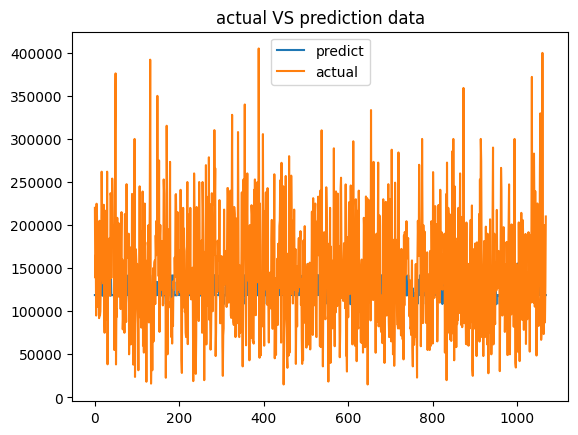

In [252]:
plt.plot(y_pred_tune,label='predict')
plt.plot(y_test,label='actual')
plt.title('actual VS prediction data')
plt.legend()


<Axes: >

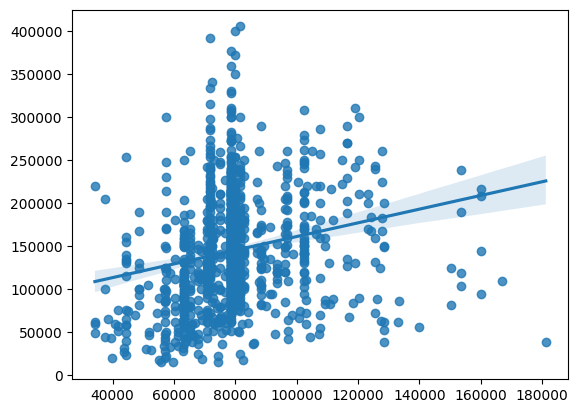

In [253]:

sns.regplot(x=y_pred,y=y_test)